# <font color='#5581A5'> Natural Language Processing

<font color=#5581A5> **The objective of this project is twofold: to delve into the study of natural language processing (NLP) while advancing further in the exploration of Jupyter Notebook and Python.**

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

# About

We will begin the course by creating a sentiment analyzer. Imagine you want to watch a movie and look up reviews online. You read, interpret, and classify the review as either positive or negative. This is exactly what we will teach the computer to do—classify movie reviews. To achieve this, we will import a pre-labeled dataset and then create a Machine Learning model capable of interpreting human language and classifying the text.

We will use various visualizations, such as word clouds, to gain insights on how to improve our model. These visualizations will help us determine which preprocessing steps can make our texts more interpretable, allowing the computer to better distinguish between negative and positive sentiments.

Additionally, we will create a Pareto chart to assist in our data analysis. We will also learn about tokenization and how to use the NLTK (Natural Language Toolkit), one of the leading libraries in the field of Natural Language Processing.

In [46]:
# Imports

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
import seaborn as sns

In [2]:
# Dataset

primary_data = pd.read_csv('Dados/NLP/imdb-reviews-pt-br.csv')

In [3]:
# Checking dataset

primary_data

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [4]:
# Replacing sentiments to 0 and 1 (negative & positive)

primary_data['classification'] = primary_data.sentiment.replace(['neg','pos'], [0,1])
primary_data

,id,text_en,text_pt,sentiment,classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [5]:
# Testing count vectorizer

text = ['Watched a good movie', 'Watched a bad Movie']

vectorize = CountVectorizer(lowercase=False)
bag_of_words = vectorize.fit_transform(text)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [6]:
# Getting text dictionary

vectorize.get_feature_names_out()

array(['Movie', 'Watched', 'bad', 'good', 'movie'], dtype=object)

In [7]:
# Creating text matrix

matrix_sparse  = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorize.get_feature_names_out())
matrix_sparse

,Movie,Watched,bad,good,movie
0,0,1,0,1,1
1,1,1,1,0,0


In [8]:
# Applying on our dataset

vectorize = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorize.fit_transform(primary_data.text_en)


train, test, train_sentiment, test_sentiment = train_test_split(bag_of_words, primary_data.classification, random_state=42)

logistic_regression = LogisticRegression()
logistic_regression.fit(train, train_sentiment)
accuracy = logistic_regression.score(test, test_sentiment)

print(accuracy)

0.6493327941771129


In [9]:
# Creating function to use on next tests

def classify_text(dataset, column, classification):
    vectorize = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorize.fit_transform(dataset[column])


    train, test, train_sentiment, test_sentiment = train_test_split(bag_of_words, dataset[classification], random_state=42)

    logistic_regression = LogisticRegression()
    logistic_regression.fit(train, train_sentiment)
    return logistic_regression.score(test, test_sentiment)

print(classify_text(primary_data, 'text_en', 'classification'))

0.6493327941771129


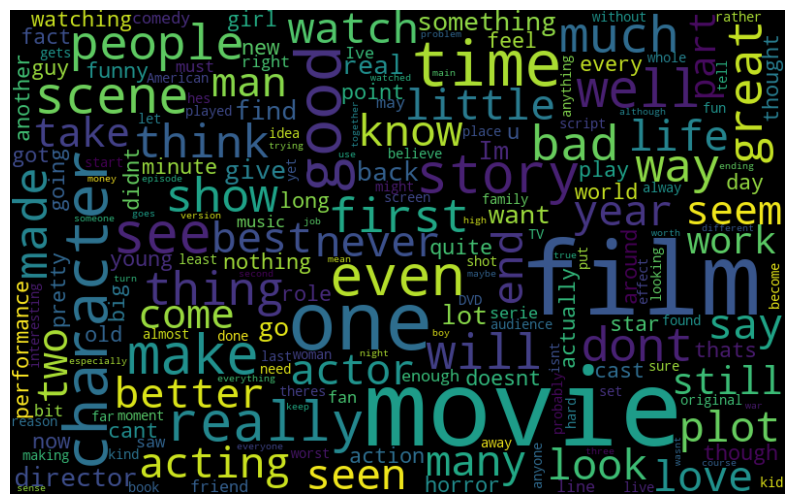

In [22]:
# Creating variable to storage all words

words = ''.join([text for text in primary_data.text_en])

# Creating word cloud

word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(words)

# Plotting

plt.figure(figsize= (10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('Off')
plt.show()

In [31]:
# Separating in good ratings and bad ratings

def bad_ratings_cloud(text, column):
    
    text_bad = text.query('sentiment == "neg"')
    

    words = ''.join([text for text in text_bad[column]])
    
    # Creating word cloud
    
    word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(words)
    
    # Plotting
    
    plt.figure(figsize= (10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('Off')
    plt.show()

def good_ratings_cloud(text, column):
    
    text_good = text.query('sentiment == "pos"')
    

    words = ''.join([text for text in text_good[column]])
    
    # Creating word cloud
    
    word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(words)
    
    # Plotting
    
    plt.figure(figsize= (10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('Off')
    plt.show()

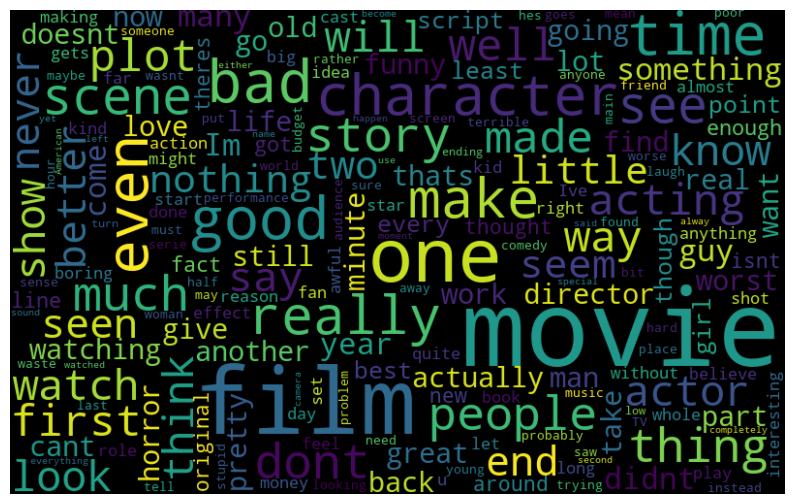

In [35]:
# Bad ratings wordcloud

bad_ratings_cloud(primary_data, 'text_en')

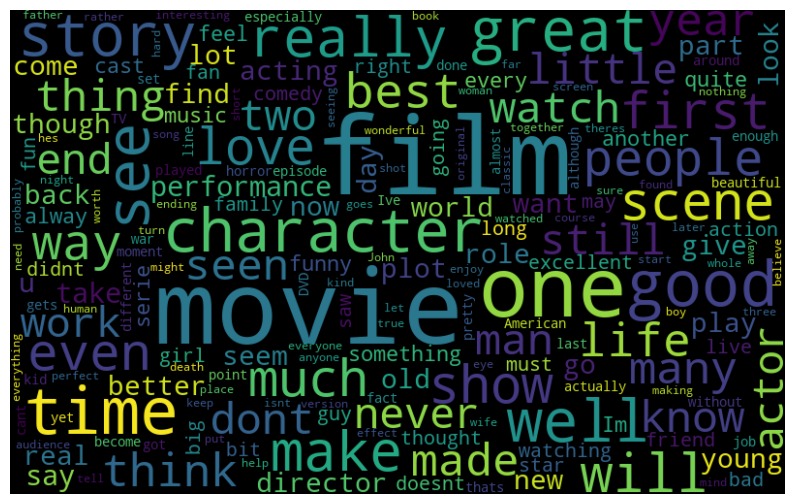

In [34]:
# Good ratings wordcloud

good_ratings_cloud(primary_data, 'text_en')

In [45]:
# Tokenize data

tokenize_space = tokenize.WhitespaceTokenizer()
tokenize_words = tokenize_space.tokenize(words)
frequency = nltk.FreqDist(tokenize_words)


# Creating dataframe for frequency

df_frequency = pd.DataFrame({'Word': list(frequency.keys()), 'Frequency': list(frequency.values())})
df_frequency

,Word,Frequency
0,Once,535
1,again,3275
2,Mr.,1898
3,Costner,57
4,has,30803
...,...,...
431122,"""Union",1
431123,rosy-hued,1
431124,plot-tool,1
431125,fluff--and,1


In [48]:
# Creating function to plot pareto

def pareto_plot(df, column, quantity):

    words = ''.join([text for text in df[column]])
    tokenize_words = tokenize_space.tokenize(words)
    frequency = nltk.FreqDist(tokenize_words)
    df_frequency = pd.DataFrame({'Word': list(frequency.keys()), 'Frequency': list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns='Frequency', n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequency, x='Word', y='Frequency', color='gray')
    ax.set(ylabel='Count')
    plt.show()

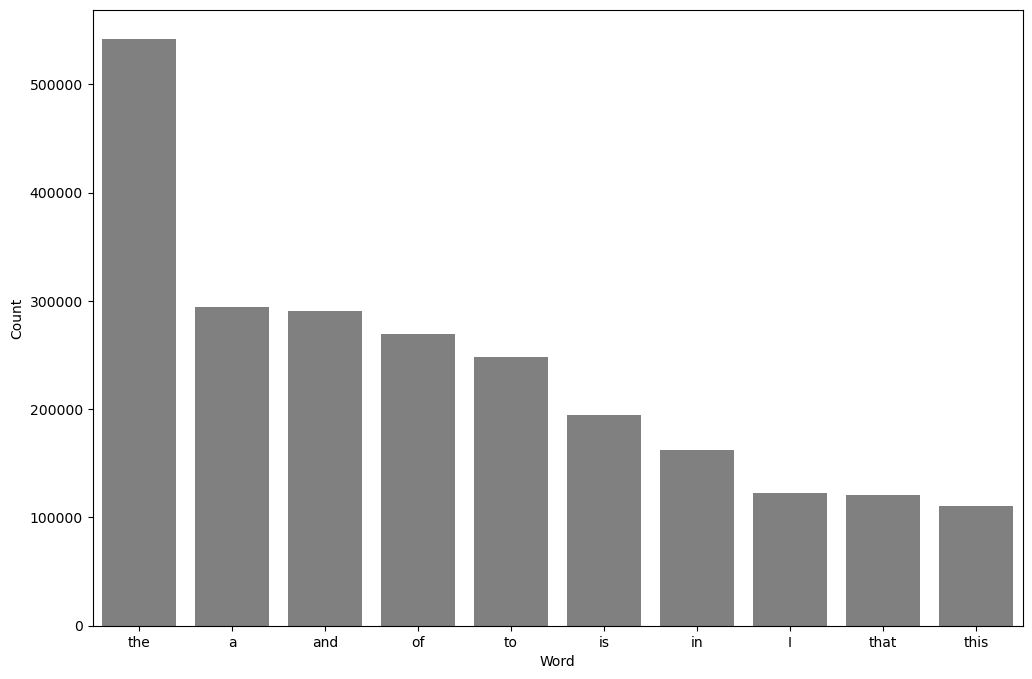

In [50]:
# Plotting our data

pareto_plot(primary_data, 'text_en', 10)

In [53]:
# Irrelevant words

# nltk.download('stopwords')

irrelevant_words = nltk.corpus.stopwords.words('english')
print(irrelevant_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [59]:
# Removing stopwords from our dataset

processed_phrases = list()

for rating in primary_data.text_en:
    new_phrase = list()
    text_words = tokenize_space.tokenize(rating)
    for word in text_words:
        if word not in irrelevant_words:
            new_phrase.append(word)
    processed_phrases.append(' '.join(new_phrase))

primary_data['treatment_01'] = processed_phrases
primary_data.head()

,id,text_en,text_pt,sentiment,classification,Treatment_01,treatment_01
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Once Mr. Costner dragged movie far longer nece...,Once Mr. Costner dragged movie far longer nece...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,This example majority action films same. Gener...,This example majority action films same. Gener...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"First I hate moronic rappers, couldnt act gun ...","First I hate moronic rappers, couldnt act gun ..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...


In [60]:
# Classify new column

classify_text(primary_data, 'treatment_01', 'classification')

0.705378083299636

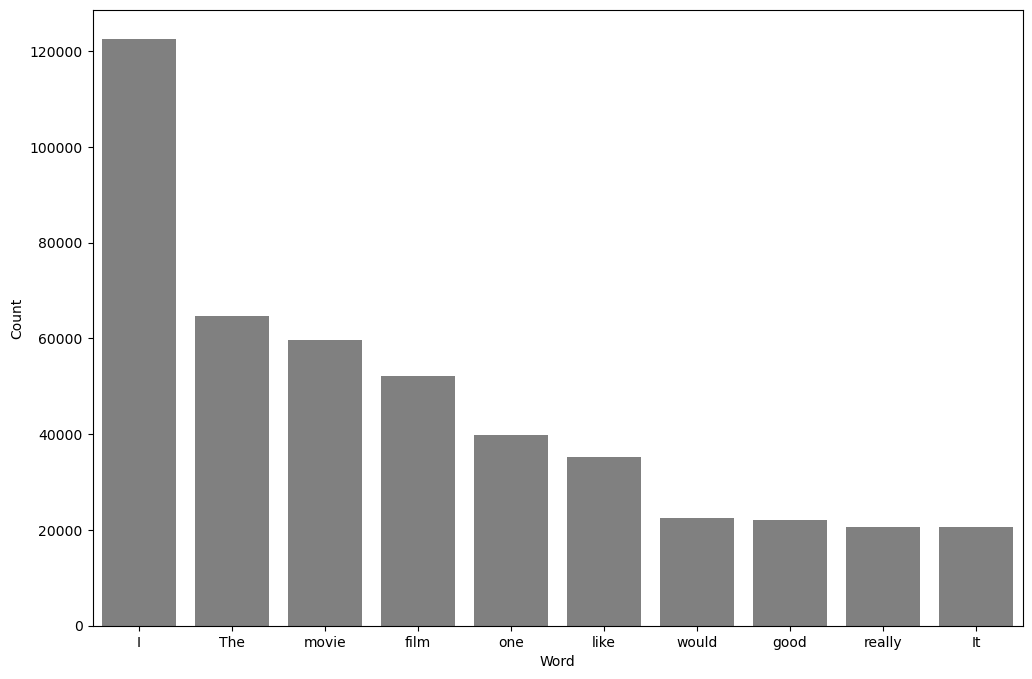

In [61]:
# Plotting

pareto_plot(primary_data, 'treatment_01', 10)